In [1]:
import pandas as pd
df = pd.read_csv('problem_set_2_data.csv')
df.head(6)

,year,I_cartel,P,Q,q_basf,q_emerck,q_roche,q_takeda,q_fri
0,1980,0,10.932500,2.68177,0.00000,0.34863,1.36770,0.48272,0.48272
1,1981,0,11.659167,2.89156,0.00000,0.34699,1.56144,0.52048,0.46265
2,1982,0,11.310000,2.73986,0.13699,0.32878,1.47953,0.52057,0.27399
3,1983,0,10.857500,2.88158,0.14408,0.31697,1.52724,0.54750,0.34579
4,1984,0,10.525000,2.95320,0.20672,0.35438,1.62426,0.53158,0.23626
5,1985,1,9.956667,2.94722,0.14736,0.35367,1.62097,0.53050,0.29472


### Data Description

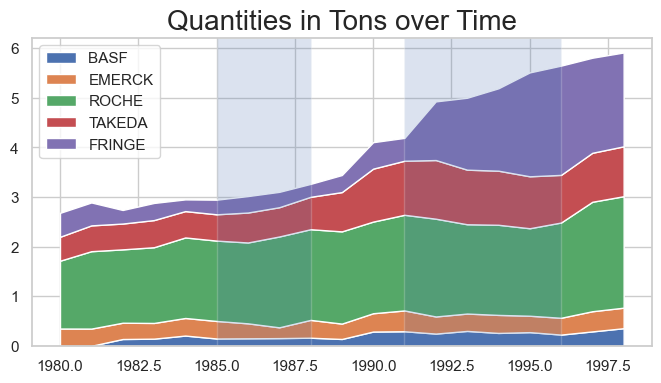

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['figure.titlesize'] = 59
plt.rcParams['axes.titlesize'] = 20
y = np.vstack([df.q_basf, df.q_emerck, df.q_roche,df.q_takeda, df.q_fri])
plt.stackplot(df.year.astype(int), y, labels=["BASF ", "EMERCK", "ROCHE", "TAKEDA", "FRINGE"])
plt.legend(loc='upper left')
plt.axvspan(1985, 1988, alpha=0.2)
plt.axvspan(1991, 1996, alpha=0.2)
plt.title('Quantities in Tons over Time')
plt.show()

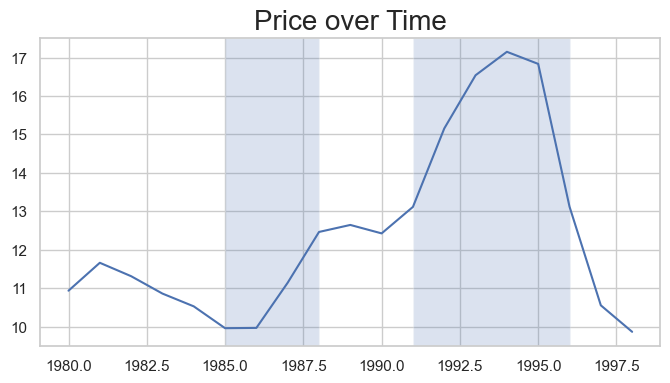

In [4]:
plt.plot(df.year,df.P, label = ['Price in $/kg'])
plt.axvspan(1985, 1988, alpha=0.2)
plt.axvspan(1991, 1996, alpha=0.2)
plt.title('Price over Time')
plt.show()

### Calibration

(2) 
- Market demand: $Q^D = \alpha_1 P + \epsilon$
- Demand net of fringe supply: $Q^C = Q^D - Q^F$
- Firms: $i \in \{R,T,E,B\}$
- Cost function: $c(q) = \bar{c}_i q$
- Firm i problem: $\pi_i = \max_{q_i \geq 0} q_i P - \bar{c}_i q_i$
- FOC for firm i: $q_i=-\alpha_1(P-\bar{c}_i)$

(3) Calibrating alpha

- FOC for firm i: $-q_i/(P-\bar{c}_i)=\alpha_1$
- FOC for firm i in period t: $-q_{i,t}/(P_{t}-\bar{c}_i)=\alpha_{1,t}$
- $\bar{\alpha}_{1}= T^{-1} \sum_t \alpha_{1,t}$



In [5]:
years = [1980,1981,1982,1983,1984]
c_ = 5.9
alphas = []
Ps = list(df.P[df.year.isin(years)])
qs = list(df.q_roche[df.year.isin(years)])

for t in range(len(years)):
    alphas.append(-qs[t]/(Ps[t]-c_))
alpha = np.mean(alphas)
print('calibrated alpha', alpha)

calibrated alpha -0.29512690786553064


(3) Calibrating marginal costs

- FOC for firm i: $\bar{c}_{i,t} = \frac{q_{i,t}+\alpha_1 P_{t}}{\alpha_1}$
- $\bar{c}_{i}= T^{-1} \sum_t \bar{c}_{i,t}$



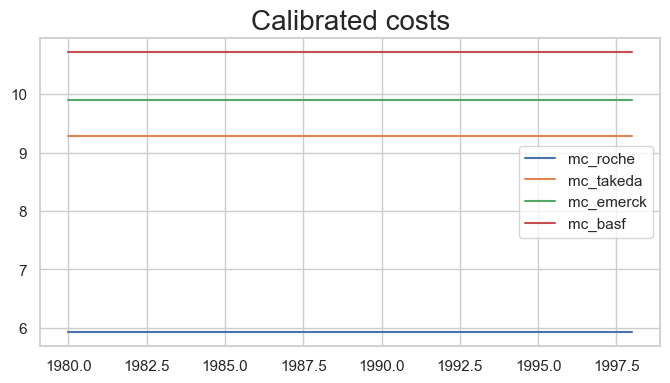

In [7]:
def calculateMC(alpha, years, name):
    cs = []
    Ps = list(df.P[df.year.isin(years)])
    name = 'q_' + str(name)
    qs = list(df[name][df.year.isin(years)])
    for t in range(len(years)):
        cs.append((qs[t]+alpha*Ps[t])/alpha)
    c = np.mean(cs)
    return np.ones(df.shape[0])*c
 
df['mc_roche'] = calculateMC(alpha, years, 'roche')
df['mc_takeda'] = calculateMC(alpha, years, 'takeda')
df['mc_emerck'] = calculateMC(alpha, years, 'emerck')
df['mc_basf'] = calculateMC(alpha,years, 'basf')

plt.plot(df.year,df['mc_roche'], label = 'mc_roche')
plt.plot(df.year,df['mc_takeda'], label = 'mc_takeda')
plt.plot(df.year,df['mc_emerck'], label = 'mc_emerck')
plt.plot(df.year,df['mc_basf'], label = 'mc_basf')
plt.legend()
plt.title('Calibrated costs') 
plt.show()

(5) Demand shifter

- Market demand: $Q^D = \alpha_1 P + \epsilon$
- Market demand: $Q^D - \alpha_1 P = \epsilon$



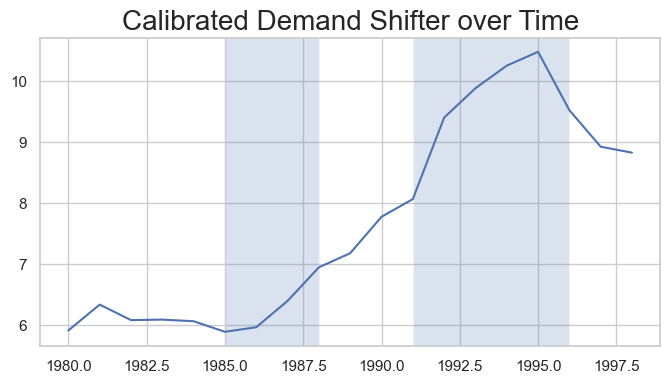

In [8]:
df['eps'] = df.Q - alpha * df.P
plt.plot(df.year,df.eps, label = ['Demand Shifter'])
plt.axvspan(1985, 1988, alpha=0.2)
plt.axvspan(1991, 1996, alpha=0.2)
plt.title('Calibrated Demand Shifter over Time')
plt.show()

(6) Merger Simulation

- if all 4 firms were to merge, then optimization equation is:
- At period t, $\pi = \max P(q_1 + q_2 + q_3 + q_4) - (c_1 q_1 + c_2 q_2 + c_3 q_3 + c_4 q_4)$
- subject to, $P = (1/\alpha) * (q_1 + q_2 + q_3 + q_4 + q_f - \epsilon)$
- Without capacity constraints, Monopoly would only produce with lowest cost firm - i.e. Roche
- At period t, $\pi = \max P q - c q$
- FOC: $P  + (1/alpha) * (q+q_f) - c = 0$
- Solution: $q_m = 0.5 (\epsilon + \alpha * c  - q_f)$
- Solution: $P_m = c - (1/\alpha) * q_m$






In [20]:
df['q_m'] = 0.5 * (df.eps + alpha * df.mc_roche - df.q_fri)
df['p_m'] = 1/alpha * (df.q_m+df.q_fri-df.eps)
df.head(1)

,year,I_cartel,P,Q,q_basf,q_emerck,q_roche,q_takeda,q_fri,mc_roche,mc_takeda,mc_emerck,mc_basf,eps,q_m,p_m
0,1980,0,10.9325,2.68177,0.0,0.34863,1.3677,0.48272,0.48272,5.933498,9.292948,9.907667,10.72627,5.908245,1.837195,12.1586


In [23]:
def computeCournot(x):
    B1 = alpha * x['mc_basf'] + x.eps - x.q_fri
    B2 = alpha * x.mc_roche + x.eps - x.q_fri
    B3 = alpha * x.mc_takeda + x.eps - x.q_fri
    B4 = alpha * x.mc_emerck + x.eps - x.q_fri
    B = np.array([B1,B2,B3,B4])
    A = np.array([[2,1,1,1],[1,2,1,1],[1,1,2,1],[1,1,1,2]])
    Q = np.dot(np.linalg.inv(A),B)
    return list(Q)
   
df[['q_cournot_basf', 'q_cournot_roche', 'q_cournot_takeda','q_cournot_emerck']] = df.apply(computeCournot, result_type='expand', axis = 1)
df['q_cournot'] = df['q_cournot_basf']+df['q_cournot_roche']+df['q_cournot_takeda']+df['q_cournot_emerck']
df['p_cournot'] = (1/alpha)*(df['q_cournot']+df['q_fri']-df['eps'])
df['pi_cournot_basf'] = df['q_cournot_basf']*df['p_cournot']- df['q_cournot_basf']*df['mc_basf']
df['pi_cournot_roche'] = df['q_cournot_roche']*df['p_cournot']- df['q_cournot_roche']*df['mc_roche']
df['pi_cournot_takeda'] = df['q_cournot_takeda']*df['p_cournot']- df['q_cournot_takeda']*df['mc_takeda']
df['pi_cournot_emerck'] = df['q_cournot_emerck']*df['p_cournot']- df['q_cournot_emerck']*df['mc_emerck']

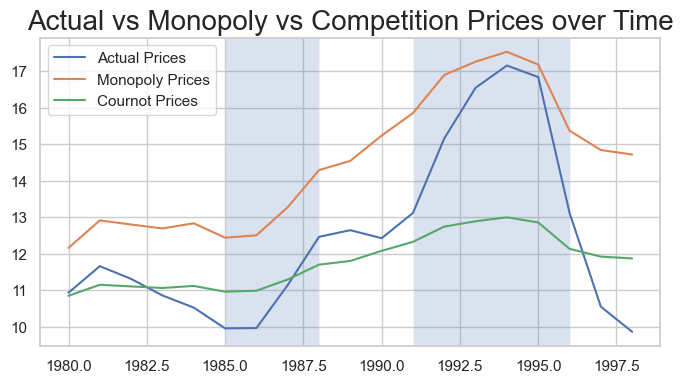

In [26]:
df['eps'] = df.Q - alpha * df.P
plt.plot(df.year,df.P, label = 'Actual Prices')
plt.plot(df.year,df.p_m, label = 'Monopoly Prices')
plt.plot(df.year,df.p_cournot, label = 'Cournot Prices')
plt.axvspan(1985, 1988, alpha=0.2)
plt.axvspan(1991, 1996, alpha=0.2)
plt.title('Actual vs Monopoly vs Competition Prices over Time')
plt.legend()
plt.show()

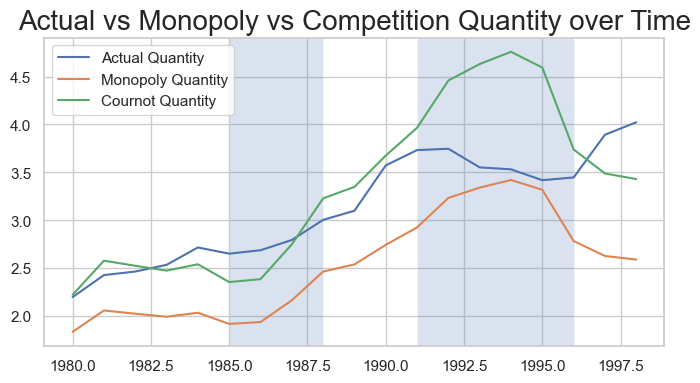

In [27]:
plt.plot(df.year,df.Q-df.q_fri, label = 'Actual Quantity')
plt.plot(df.year,df.q_m, label = 'Monopoly Quantity')
plt.plot(df.year,df.q_cournot, label = 'Cournot Quantity')
plt.axvspan(1985, 1988, alpha=0.2)
plt.axvspan(1991, 1996, alpha=0.2)
plt.title('Actual vs Monopoly vs Competition Quantity over Time')
plt.legend()
plt.show()

### Collusion

(7) Roche as cartel leader

- with shares fixed to pre 1990 levels, Roche is effectively choosing total cartel quantity (as it is also min cost producer)
- this is same as monopoly output
- prices will be monopoly prices

#### (8a) Cartel

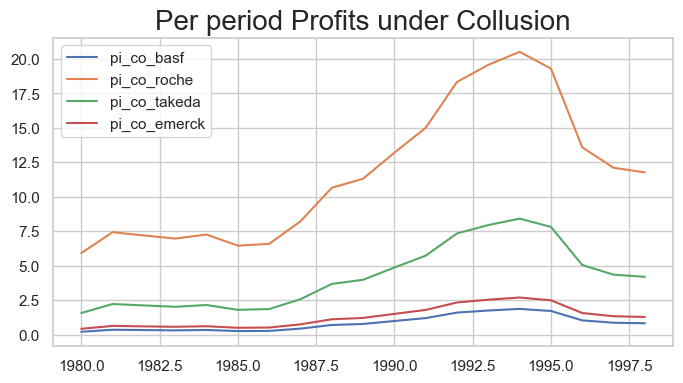

In [29]:
df1990 = df[df.year.isin([1990])]

# profits under collusion
df['sh_basf'] = float(df1990.q_basf/(df1990.Q-df1990.q_fri))
df['sh_roche'] = float(df1990.q_roche/(df1990.Q-df1990.q_fri))
df['sh_takeda'] = float(df1990.q_takeda/(df1990.Q-df1990.q_fri))
df['sh_emerck'] = float(df1990.q_emerck/(df1990.Q-df1990.q_fri))
df['q_co_basf'] = df['sh_basf']*df['q_m']
df['q_co_roche'] = df['sh_roche']*df['q_m']
df['q_co_takeda'] = df['sh_takeda']*df['q_m']
df['q_co_emerck'] = df['sh_emerck']*df['q_m']
df['pi_co_basf'] = df['q_co_basf']*df['p_m']- df['q_co_basf']*df['mc_basf']
df['pi_co_roche'] = df['q_co_roche']*df['p_m']- df['q_co_roche']*df['mc_roche']
df['pi_co_takeda'] = df['q_co_takeda']*df['p_m']- df['q_co_takeda']*df['mc_takeda']
df['pi_co_emerck'] = df['q_co_emerck']*df['p_m']- df['q_co_emerck']*df['mc_emerck']

plt.plot(df.year,df['pi_co_basf'], label = 'pi_co_basf')
plt.plot(df.year,df['pi_co_roche'], label = 'pi_co_roche')
plt.plot(df.year,df['pi_co_takeda'], label = 'pi_co_takeda')
plt.plot(df.year,df['pi_co_emerck'], label = 'pi_co_emerck')
plt.legend()
plt.title('Per period Profits under Collusion') 
plt.show()

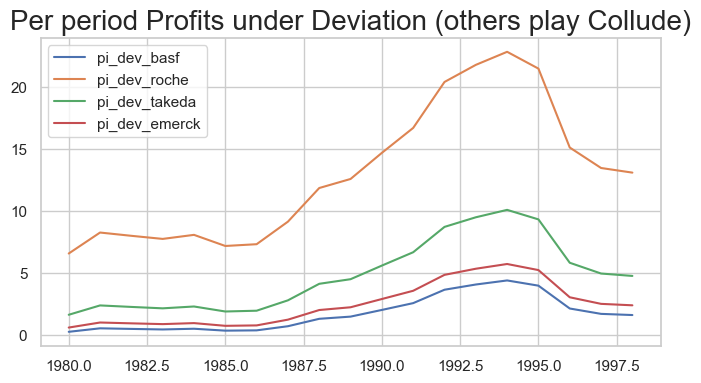

In [30]:
# profits under deviation
df['q_dev_basf'] = 0.5*(alpha *df['mc_basf'] + df['eps'] - df['q_fri'] - (1-df['sh_basf'])*df['q_m'])
df['q_dev_roche'] = 0.5*(alpha *df['mc_roche'] + df['eps'] - df['q_fri'] - (1-df['sh_roche'])*df['q_m'])
df['q_dev_takeda'] = 0.5*(alpha *df['mc_takeda'] + df['eps'] - df['q_fri'] - (1-df['sh_takeda'])*df['q_m'])
df['q_dev_emerck'] = 0.5*(alpha *df['mc_emerck'] + df['eps'] - df['q_fri'] - (1-df['sh_emerck'])*df['q_m'])
df['p_dev_basf'] = 1/alpha*((1-df['sh_basf'])*df['q_m'] + df['q_dev_basf'] + df['q_fri'] - df['eps'])
df['p_dev_roche'] = 1/alpha*((1-df['sh_roche'])*df['q_m'] + df['q_dev_roche'] + df['q_fri'] - df['eps'])
df['p_dev_takeda'] = 1/alpha*((1-df['sh_takeda'])*df['q_m'] + df['q_dev_takeda'] + df['q_fri'] - df['eps'])
df['p_dev_emerck'] = 1/alpha*((1-df['sh_emerck'])*df['q_m'] + df['q_dev_emerck'] + df['q_fri'] - df['eps'])
df['pi_dev_basf'] = df['q_dev_basf']*df['p_dev_basf']- df['q_dev_basf']*df['mc_basf']
df['pi_dev_roche'] = df['q_dev_roche']*df['p_dev_roche']- df['q_dev_roche']*df['mc_roche']
df['pi_dev_takeda'] = df['q_dev_takeda']*df['p_dev_takeda']- df['q_dev_takeda']*df['mc_takeda']
df['pi_dev_emerck'] = df['q_dev_emerck']*df['p_dev_emerck']- df['q_dev_emerck']*df['mc_emerck']
plt.plot(df.year,df['pi_dev_basf'], label = 'pi_dev_basf')
plt.plot(df.year,df['pi_dev_roche'], label = 'pi_dev_roche')
plt.plot(df.year,df['pi_dev_takeda'], label = 'pi_dev_takeda')
plt.plot(df.year,df['pi_dev_emerck'], label = 'pi_dev_emerck')
plt.legend()
plt.title('Per period Profits under Deviation (others play Collude)') 
plt.show()

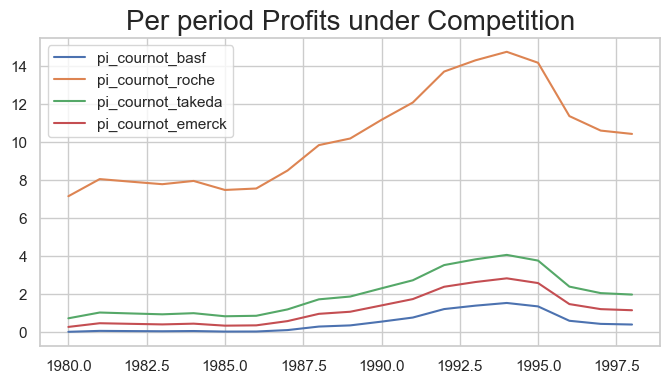

In [28]:
plt.plot(df.year,df['pi_cournot_basf'], label = 'pi_cournot_basf')
plt.plot(df.year,df['pi_cournot_roche'], label = 'pi_cournot_roche')
plt.plot(df.year,df['pi_cournot_takeda'], label = 'pi_cournot_takeda')
plt.plot(df.year,df['pi_cournot_emerck'], label = 'pi_cournot_emerck')
plt.legend()
plt.title('Per period Profits under Competition') 
plt.show()

#### Comparative Analysis for 4 firms

- deviation gives highest profits, while competition gives lowest. 

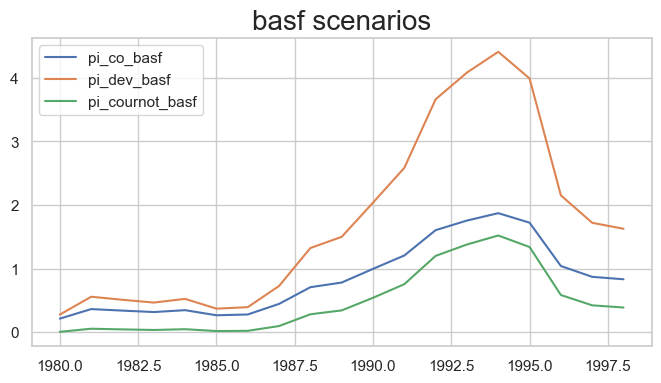

In [31]:
plt.plot(df.year,df['pi_co_basf'], label = 'pi_co_basf')
plt.plot(df.year,df['pi_dev_basf'], label = 'pi_dev_basf')
plt.plot(df.year,df['pi_cournot_basf'], label = 'pi_cournot_basf')
plt.legend()
plt.title('basf scenarios') 
plt.show()

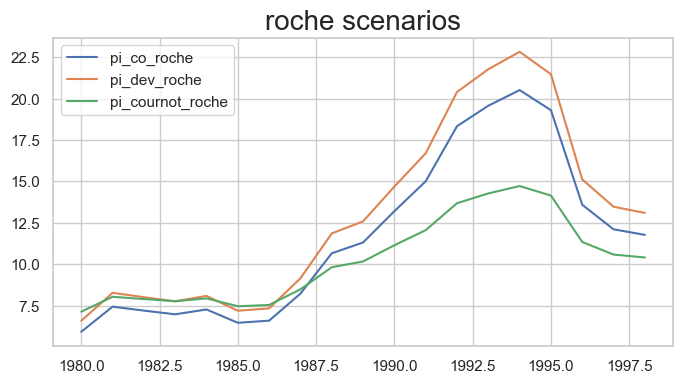

In [33]:
plt.plot(df.year,df['pi_co_roche'], label = 'pi_co_roche')
plt.plot(df.year,df['pi_dev_roche'], label = 'pi_dev_roche')
plt.plot(df.year,df['pi_cournot_roche'], label = 'pi_cournot_roche')
plt.legend()
plt.title('roche scenarios') 
plt.show()

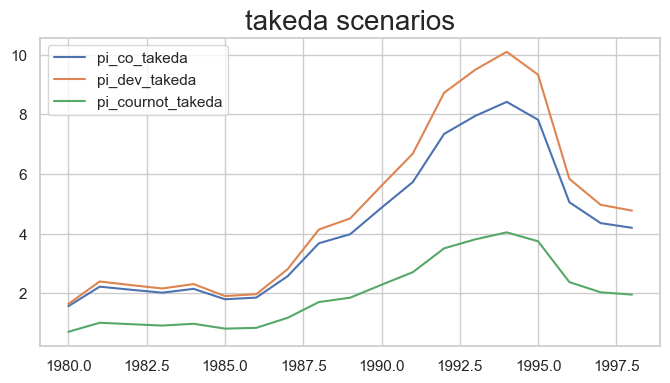

In [34]:
plt.plot(df.year,df['pi_co_takeda'], label = 'pi_co_takeda')
plt.plot(df.year,df['pi_dev_takeda'], label = 'pi_dev_takeda')
plt.plot(df.year,df['pi_cournot_takeda'], label = 'pi_cournot_takeda')
plt.legend()
plt.title('takeda scenarios') 
plt.show()

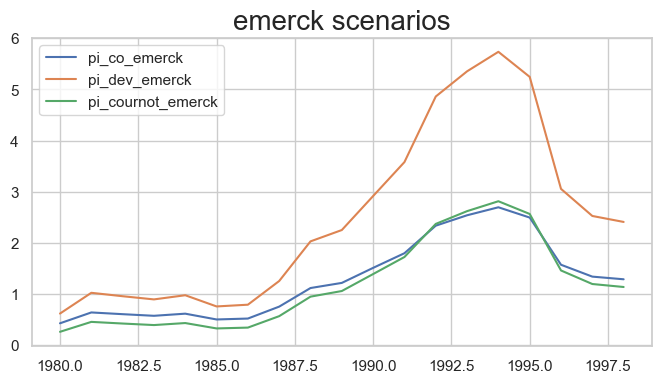

In [35]:
plt.plot(df.year,df['pi_co_emerck'], label = 'pi_co_emerck')
plt.plot(df.year,df['pi_dev_emerck'], label = 'pi_dev_emerck')
plt.plot(df.year,df['pi_cournot_emerck'], label = 'pi_cournot_emerck')
plt.legend()
plt.title('emerck scenarios') 
plt.show()

In [36]:
df.head()

,year,I_cartel,P,Q,q_basf,q_emerck,q_roche,q_takeda,q_fri,mc_roche,...,q_dev_takeda,q_dev_emerck,p_dev_basf,p_dev_roche,p_dev_takeda,p_dev_emerck,pi_dev_basf,pi_dev_roche,pi_dev_takeda,pi_dev_emerck
0,1980,0,10.932500,2.68177,0.00000,0.34863,1.36770,0.48272,0.48272,5.933498,...,0.697389,0.427183,11.692867,10.655993,11.655962,11.355120,0.275739,6.581908,1.647940,0.618327
1,1981,0,11.659167,2.89156,0.00000,0.34699,1.56144,0.52048,0.46265,5.933498,...,0.841665,0.549753,12.099529,11.227052,12.144823,11.770436,0.556562,8.269962,2.400323,1.024063
2,1982,0,11.310000,2.73986,0.13699,0.32878,1.47953,0.52057,0.27399,5.933498,...,0.820205,0.531522,12.039042,11.142112,12.072109,11.708661,0.508612,8.006693,2.279482,0.957268
3,1983,0,10.857500,2.88158,0.14408,0.31697,1.52724,0.54750,0.34579,5.933498,...,0.799545,0.513970,11.980809,11.060339,12.002106,11.649189,0.464491,7.757261,2.166094,0.895091
4,1984,0,10.525000,2.95320,0.20672,0.35438,1.62426,0.53158,0.23626,5.933498,...,0.826503,0.536872,12.056793,11.167040,12.093449,11.726790,0.522461,8.083515,2.314622,0.976637


### 9) Incentive Compatibility Constraints

- for each firm i, we require at t, $\pi^m_{i,t} + \sum_{r} \delta^r \pi^m_{i,t+r} >= \pi^d_{i,t} + \sum_{r} \delta^r \pi^c_{i,t+r}$
- given profit from collusion $\pi^m_{i,t}$, profit from deviation $\pi^d_{i,t}$, and profit from competition $\pi^m_{i,t}$. 

### 10) Scenario 1: fringe supply constant and constant effective demand shifter

In [ ]:
df1990 = df[df.year.isin([1990])]

# profits under collusion
df['sh_basf'] = float(df1990.q_basf/(df1990.Q-df1990.q_fri))
df['sh_roche'] = float(df1990.q_roche/(df1990.Q-df1990.q_fri))
df['sh_takeda'] = float(df1990.q_takeda/(df1990.Q-df1990.q_fri))
df['sh_emerck'] = float(df1990.q_emerck/(df1990.Q-df1990.q_fri))
df['q_co_basf'] = df['sh_basf']*df['q_m']
df['q_co_roche'] = df['sh_roche']*df['q_m']
df['q_co_takeda'] = df['sh_takeda']*df['q_m']
df['q_co_emerck'] = df['sh_emerck']*df['q_m']
df['pi_co_basf_sn1'] = df['q_co_basf']*df['p_m']- df['q_co_basf']*df['mc_basf']
df['pi_co_roche_sn1'] = df['q_co_roche']*df['p_m']- df['q_co_roche']*df['mc_roche']
df['pi_co_takeda_sn1'] = df['q_co_takeda']*df['p_m']- df['q_co_takeda']*df['mc_takeda']
df['pi_co_emerck_sn1'] = df['q_co_emerck']*df['p_m']- df['q_co_emerck']*df['mc_emerck']

plt.plot(df.year,df['pi_co_basf'], label = 'pi_co_basf')
plt.plot(df.year,df['pi_co_roche'], label = 'pi_co_roche')
plt.plot(df.year,df['pi_co_takeda'], label = 'pi_co_takeda')
plt.plot(df.year,df['pi_co_emerck'], label = 'pi_co_emerck')
plt.legend()
plt.title('Per period Profits under Collusion') 
plt.show()

In [56]:
delta = 0.8

def NPV(x,d):
    val = 0
    for x_i,x_ in enumerate(x):
        val += x_ * (d ** (x_i+1))
    return val

def computeICC(x):
    current_year = x.year
    mask = [df.year>current_year]
    ICCs = []

    for name in ['basf', 'roche', 'takeda','emerck']:
        pi_dev_name = 'pi_dev_' + name + '_s1'
        pi_co_name = 'pi_co_' + name + '_s1'
        pi_cournot_name = 'pi_cournot_' + name + '_s1'
        sh_name = 'sh_' + name
        df['q_m'] = 0.5 * (df.eps + alpha * df.mc_roche - df.q_fri[df.year>current_year])
        df['p_m'] = 1/alpha * (df.q_m+df.q_fri[df.year>current_year]-df.eps)
        df['q_co_basf'] = df[sh_name]*df['q_m']


        A = x[pi_dev_name] + NPV(df[pi_cournot_name][df.year>current_year],delta)
        B = x[pi_co_name] + NPV(df[pi_co_name][df.year>current_year],delta)
        ICCs.append(A-B)
    return ICCs

df[['ICC_basf', 'ICC_roche', 'ICC_takeda','ICC_emerck']] = df.apply(computeICC, result_type='expand', axis = 1)   
df

,year,I_cartel,P,Q,q_basf,q_emerck,q_roche,q_takeda,q_fri,mc_roche,...,p_dev_takeda,p_dev_emerck,pi_dev_basf,pi_dev_roche,pi_dev_takeda,pi_dev_emerck,ICC_basf,ICC_roche,ICC_takeda,ICC_emerck
0,1980,0,10.932500,2.68177,0.00000,0.34863,1.36770,0.48272,0.48272,5.933498,...,11.655962,11.355120,0.275739,6.581908,1.647940,0.618327,-1.188039,0.961434,-5.702320,-0.448548
1,1981,0,11.659167,2.89156,0.00000,0.34699,1.56144,0.52048,0.46265,5.933498,...,12.144823,11.770436,0.556562,8.269962,2.400323,1.024063,-1.061475,0.608106,-5.838480,-0.230219
2,1982,0,11.310000,2.73986,0.13699,0.32878,1.47953,0.52057,0.27399,5.933498,...,12.072109,11.708661,0.508612,8.006693,2.279482,0.957268,-1.103729,-0.173137,-6.204583,-0.233907
3,1983,0,10.857500,2.88158,0.14408,0.31697,1.52724,0.54750,0.34579,5.933498,...,12.002106,11.649189,0.464491,7.757261,2.166094,0.895091,-1.161717,-1.234737,-6.708396,-0.229446
4,1984,0,10.525000,2.95320,0.20672,0.35438,1.62426,0.53158,0.23626,5.933498,...,12.093449,11.726790,0.522461,8.083515,2.314622,0.976637,-1.161420,-2.375161,-7.229566,-0.143566
5,1985,1,9.956667,2.94722,0.14736,0.35367,1.62097,0.53050,0.29472,5.933498,...,11.838004,11.509775,0.368905,7.188012,1.911628,0.757518,-1.320960,-4.263285,-8.147794,-0.200173
6,1986,1,9.964167,3.02046,0.15102,0.30205,1.63105,0.60409,0.33225,5.933498,...,11.879729,11.545223,0.392166,7.330695,1.974822,0.791410,-1.409474,-6.443891,-9.189730,-0.120867
7,1987,1,11.140833,3.10553,0.15528,0.21739,1.83226,0.59005,0.31055,5.933498,...,12.379281,11.969621,0.725879,9.147851,2.811217,1.254778,-1.274914,-8.316212,-10.001468,0.197687
8,1988,1,12.461667,3.26616,0.16331,0.35928,1.82905,0.65323,0.26129,5.933498,...,13.039103,12.530178,1.322883,11.856072,4.141716,2.029755,-0.903730,-9.513059,-10.365351,0.701896
9,1989,0,12.644167,3.44473,0.13779,0.31003,1.86015,0.79229,0.34447,5.933498,...,13.203316,12.669686,1.499097,12.584573,4.512778,2.251450,-0.742244,-10.970664,-10.877418,0.929481


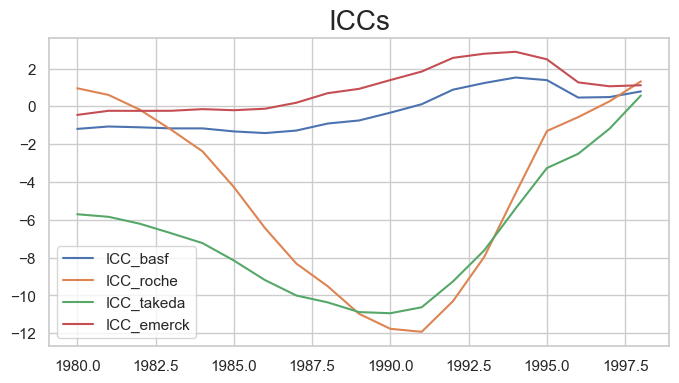

In [58]:
plt.plot(df.year,df['ICC_basf'], label = 'ICC_basf')
plt.plot(df.year,df['ICC_roche'], label = 'ICC_roche')
plt.plot(df.year,df['ICC_takeda'], label = 'ICC_takeda')
plt.plot(df.year,df['ICC_emerck'], label = 'ICC_emerck')
plt.legend()
plt.title('ICCs') 
plt.show()